In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

Load datasets:

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Train data shape: {} ".format(train_df.shape))
print("Test data shape: {} ".format(test_df.shape))

Train data shape: (1460, 81) 
Test data shape: (1459, 80) 


In [3]:
train_df.head()
#test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Save Ids for future purposes and SalePrice for fitting models:

In [4]:
train_id = train_df['Id']
test_id = test_df['Id']
target = train_df['SalePrice']

Remove Ids and SalePrice:

In [5]:
train_df.drop(columns=['Id', 'SalePrice'], inplace=True)
test_df.drop('Id', axis=1, inplace=True)
print("Train data shape: {} ".format(train_df.shape))
print("Test data shape: {} ".format(test_df.shape))

Train data shape: (1460, 79) 
Test data shape: (1459, 79) 


Concatenate train and test data for cleaning:

In [6]:
data = pd.concat([train_df, test_df])
print("Data shape: {} ".format(data.shape))

Data shape: (2919, 79) 


See types presented in data: 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

Separate categorical and numerical features for cleaning: 

In [8]:
print('General number of features: {}'.format(data.shape[1]))
categorical = data.select_dtypes(include='object')
numerical = data.select_dtypes(exclude='object')
print('Number of categorical features: {}'.format(categorical.shape[1]))
print(categorical.columns)
print('Number of numerical features: {}'.format(numerical.shape[1]))
print(numerical.columns)

General number of features: 79
Number of categorical features: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Number of numerical features: 36
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
      

Start exploring categorical features: 

In [9]:
categorical.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
Heating             0
Condition1          0
Street              0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
RoofStyle           0
Condition2          0
BldgType            0
HouseStyle          0
HeatingQC           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
CentralAir          0
SaleCondition       0
dtype: int64

In [10]:
# Fill with None missing values where NAN means absence of feature
categorical.loc[:, 'PoolQC'] = categorical.loc[:,'PoolQC'].fillna('None')
categorical.loc[:, 'MiscFeature'] = categorical.loc[:,'MiscFeature'].fillna('None')
categorical.loc[:, 'Alley'] = categorical.loc[:,'Alley'].fillna('None')
categorical.loc[:, 'Fence'] = categorical.loc[:,'Fence'].fillna('None')
categorical.loc[:, 'FireplaceQu'] = categorical.loc[:,'FireplaceQu'].fillna('None')
categorical.loc[:, 'GarageCond'] = categorical.loc[:,'GarageCond'].fillna('None')
categorical.loc[:, 'GarageQual'] = categorical.loc[:,'GarageQual'].fillna('None')
categorical.loc[:, 'GarageFinish'] = categorical.loc[:,'GarageFinish'].fillna('None')
categorical.loc[:, 'GarageType'] = categorical.loc[:,'GarageType'].fillna('None')
categorical.loc[:, 'BsmtCond'] = categorical.loc[:,'BsmtCond'].fillna('None')
categorical.loc[:, 'BsmtExposure'] = categorical.loc[:,'BsmtExposure'].fillna('None')
categorical.loc[:, 'BsmtQual'] = categorical.loc[:,'BsmtQual'].fillna('None')
categorical.loc[:, 'BsmtFinType2'] = categorical.loc[:,'BsmtFinType2'].fillna('None')
categorical.loc[:, 'BsmtFinType1'] = categorical.loc[:,'BsmtFinType1'].fillna('None')
categorical.loc[:, 'MasVnrType'] = categorical.loc[:,'MasVnrType'].fillna('None')

#fill with the most frequent feature value
categorical.loc[:, 'MSZoning'] = categorical.loc[:,'MSZoning'].fillna('RL')
categorical.loc[:, 'Functional'] = categorical.loc[:,'Functional'].fillna('Typ')
categorical.loc[:, 'Utilities'] = categorical.loc[:,'Utilities'].fillna('AllPub')
categorical.loc[:, 'Electrical'] = categorical.loc[:,'Electrical'].fillna('SBrkr')
categorical.loc[:, 'KitchenQual'] = categorical.loc[:,'KitchenQual'].fillna('TA')
categorical.loc[:, 'SaleType'] = categorical.loc[:,'SaleType'].fillna('WD')
categorical.loc[:, 'Exterior2nd'] = categorical.loc[:,'Exterior2nd'].fillna('VinylSd')
categorical.loc[:, 'Exterior1st'] = categorical.loc[:,'Exterior1st'].fillna('VinylSd')

c:\users\nadine\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [11]:
#obtain most frequent feature value
data['MSZoning'].value_counts() 
data['Functional'].value_counts()
data['Utilities'].value_counts()
data['Electrical'].value_counts()
data['KitchenQual'].value_counts()
data['SaleType'].value_counts()
data['Exterior2nd'].value_counts()
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [12]:
# Add some new binary features
categorical.loc[:, 'HasPool'] = categorical.loc[:, 'PoolQC'] != 'None'
categorical.loc[:, 'HasMiscFeature'] = categorical.loc[:, 'MiscFeature'] != 'None'
categorical.loc[:, 'HasAlley'] = categorical.loc[:, 'Alley'] != 'None'
categorical.loc[:, 'HasFence'] = categorical.loc[:, 'Fence'] != 'None'
categorical.loc[:, 'HasFireplace'] = categorical.loc[:, 'FireplaceQu'] != 'None'
categorical.loc[:, 'HasGarage'] = categorical.loc[:, 'GarageCond'] != 'None'
categorical.loc[:, 'HasBasement'] = categorical.loc[:, 'BsmtCond'] != 'None'
categorical.loc[:, 'HasMasVnr'] = categorical.loc[:, 'MasVnrType'] != 'None'

c:\users\nadine\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\nadine\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
categorical.shape

(2919, 51)

In [14]:
categorical.isnull().sum()

MSZoning          0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleType          0
SaleCondition     0
HasPool           0
HasMiscFeature    0
HasAlley          0
HasFence          0
HasFireplace      0
HasGarage         0
HasBasement       0


In [15]:
numerical.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
OverallCond        0
YearBuilt          0
YearRemodAdd       0
OverallQual        0
GrLivArea          0
LotArea            0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
YrSold             0
MoSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MSSubClass         0
dtype: int64

In [16]:
# fill missing values in numerical features
numerical.loc[:, 'LotFrontage'] = numerical.loc[:,'LotFrontage'].fillna(numerical.loc[:,'LotFrontage'].mean())
numerical.loc[:, 'GarageYrBlt'] = numerical.loc[:,'GarageYrBlt'].fillna(0)
numerical.loc[:, 'MasVnrArea'] = numerical.loc[:,'MasVnrArea'].fillna(0)
numerical.loc[:, 'BsmtHalfBath'] = numerical.loc[:,'BsmtHalfBath'].fillna(0)
numerical.loc[:, 'BsmtFullBath'] = numerical.loc[:,'BsmtFullBath'].fillna(0)

numerical.loc[:, 'GarageArea'] = numerical.loc[:,'GarageArea'].fillna(0)
numerical.loc[:, 'BsmtFinSF1'] = numerical.loc[:,'BsmtFinSF1'].fillna(0)
numerical.loc[:, 'BsmtFinSF2'] = numerical.loc[:,'BsmtFinSF2'].fillna(0)
numerical.loc[:, 'BsmtUnfSF'] = numerical.loc[:,'BsmtUnfSF'].fillna(0)
numerical.loc[:, 'TotalBsmtSF'] = numerical.loc[:,'TotalBsmtSF'].fillna(0)
numerical.loc[:, 'GarageCars'] = numerical.loc[:,'GarageCars'].fillna(0)

In [17]:
numerical.isnull().sum().sort_values(ascending=False)

YrSold           0
MoSold           0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
WoodDeckSF       0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
GarageArea       0
HalfBath         0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
MSSubClass       0
dtype: int64

In [18]:
# Add new feature, showing whether or not house had reconstruction:
categorical.loc[:, 'HadRec'] = numerical.loc[:, 'YearBuilt'] == numerical.loc[:, 'YearRemodAdd']

# Add new feature, showing whether or not house had 2nd floor:
categorical.loc[:, 'Has2Floor'] = numerical.loc[:, '2ndFlrSF'] == 0

# Add new feature, overall porch area:
numerical.loc[:, 'PorchArea'] =  (numerical.loc[:, 'WoodDeckSF'] + numerical.loc[:, 'OpenPorchSF'] + 
                            numerical.loc[:, 'EnclosedPorch'] + numerical.loc[:,'3SsnPorch'] +
                            numerical.loc[:, 'ScreenPorch'])
# Add new feature, all baths:
numerical.loc[:, 'AllBath'] = (numerical.loc[:, 'BsmtFullBath'] + numerical.loc[:, 'BsmtHalfBath'] + 
                            numerical.loc[:, 'FullBath'] + numerical.loc[:,'HalfBath'])

Features that have numerical values but actually are categorical: 
1. YrSold
2. MoSold
3. MSSubClass
4. OverallCond
5. OverallQual

Should be casted to categorical.dtypes.mode() and transferred to categorical dataframe. 

In [19]:
act_cat = numerical.loc[:, ['YrSold', 'MoSold', 'MSSubClass', 'OverallCond', 'OverallQual']]
act_cat = act_cat.astype('object')
categorical = pd.concat([categorical, act_cat], axis=1)

In [20]:
categorical = categorical.astype({'HasPool': 'object', 'HasMiscFeature': 'object', 'HasAlley': 'object',
                                 'HasFence': 'object', 'HasFireplace': 'object', 'HasGarage': 'object',
                                 'HasBasement': 'object', 'HasMasVnr': 'object', 'HadRec': 'object',
                                 'Has2Floor': 'object'})

In [21]:
categorical.dtypes.unique()

array([dtype('O')], dtype=object)

In [22]:
numerical.drop(columns=act_cat, inplace=True, axis=1)

c:\users\nadine\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
def le_fit_transform(feature_name):
    le = preprocessing.LabelEncoder()
    le.fit(categorical[feature_name])
    print('Labels: {}' .format(le.classes_))
    categorical[feature_name] = le.transform(categorical[feature_name])

In [24]:
list_categorical = categorical.columns.values
for feat in list_categorical: 
    le_fit_transform(feat)

Labels: ['C (all)' 'FV' 'RH' 'RL' 'RM']
Labels: ['Grvl' 'Pave']
Labels: ['Grvl' 'None' 'Pave']
Labels: ['IR1' 'IR2' 'IR3' 'Reg']
Labels: ['Bnk' 'HLS' 'Low' 'Lvl']
Labels: ['AllPub' 'NoSeWa']
Labels: ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
Labels: ['Gtl' 'Mod' 'Sev']
Labels: ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
Labels: ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
Labels: ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
Labels: ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
Labels: ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
Labels: ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
Labels: ['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl']
Labels: ['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock

In [25]:
# Add new feature: (quality * present condition) of exterior material
numerical.loc[:, 'ExterQC'] = categorical['ExterQual']*categorical['ExterCond']

# Add new feature: (quality * condition) of basement:
numerical.loc[:, 'BasementQC'] = categorical['BsmtQual'] * categorical['BsmtCond']

# Add new feature: (quality * condition) of house:
numerical.loc[:, 'HouseQC'] = categorical['OverallQual'] * categorical['OverallCond']

In [26]:
# find and delete highly correlated features

# add polynolials for features highly correlated with target





Find and delete outliers:

In [27]:
#train_LF = numerical['LotFrontage'].iloc[:train_id.shape[0]]
#fig, ax = plt.subplots()
#plt.scatter(x=train_LF, y=target)
#plt.ylabel('SalePrice')
#plt.xlabel('LotFrontage')

In [28]:
# Remove samples with large LotFrontage but low SalePrice:

#outliers = numerical[numerical['LotFrontage'] > 300].index
#numerical.drop(outliers.values, inplace=True)
#categorical.drop(outliers.values, inplace=True) 

In [29]:
#train_BsmtFinSF1 = numerical['BsmtFinSF1'].iloc[:train_id.shape[0]]

#fig, ax = plt.subplots()
#plt.scatter(x=train_BsmtFinSF1, y=target)
#plt.ylabel('SalePrice')
#plt.xlabel('BsmtFinSF1')

In [30]:
#outliers = numerical[numerical['BsmtFinSF1'] > 2500].index
#numerical.drop(outliers.values, inplace=True)
#categorical.drop(outliers.values, inplace=True)

In [31]:
#train_GrLivArea = numerical['GrLivArea'].iloc[:train_id.shape[0]]
#fig, ax = plt.subplots()
#plt.scatter(x=train_GrLivArea, y = target)
#plt.ylabel('SalePrice')
#plt.xlabel('GrLivArea')

In [32]:
#outliers = numerical[numerical['GrLivArea'] > 4000].index
#numerical.drop(outliers.values, inplace=True)
#categorical.drop(outliers.values, inplace=True)

In [33]:
# How numerical features are distributed:

#plt.rcParams.update({'figure.max_open_warning': 0})

#num_features = numerical.columns.values

#for feat in num_features:
#    plt.figure()
#    sns.distplot(numerical[feat], hist=True, kde=False, 
#             bins=20, color = 'blue',
#             hist_kws={'edgecolor':'black'})

In [34]:
# Features to change representation: BsmtFinSF2, LowQualFinSF

#categorical['AreaFinished'] = numerical['BsmtFinSF2'] == 0
#categorical['IsLowQuality'] = numerical['LowQualFinSF'] == 0
#categorical = categorical.astype({'AreaFinished': 'object', 'IsLowQuality': 'object'})
#le_fit_transform('AreaFinished')
#le_fit_transform('IsLowQuality')

In [35]:
#categorical.dtypes.unique()

In [36]:
#numerical.drop(columns=['BsmtFinSF2', 'LowQualFinSF'], axis=1, inplace=True)

BasementQC and ExterQC seem to add none value for prediction.
Delete them both with PoolArea.

In [37]:
#numerical.drop(columns=['BasementQC', 'ExterQC', 'PoolArea'], axis=1, inplace=True)

Some features are right/left skewed as shown from the plots. Reduce this effect with log tranformation. 

In [38]:
skewness = numerical.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
print(skewed_features.values)
numerical.loc[:, skewed_features] = np.log1p(numerical.loc[:, skewed_features])

['LotFrontage' 'LotArea' 'YearBuilt' 'MasVnrArea' 'BsmtFinSF1'
 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'HalfBath'
 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'MiscVal' 'PorchArea' 'ExterQC']


In [39]:
print('Number of categorical features: {}'.format(categorical.shape[1]))
print(categorical.columns)

Number of categorical features: 58
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'HasPool', 'HasMiscFeature', 'HasAlley',
       'HasFence', 'HasFireplace', 'HasGarage', 'HasBasement', 'HasMasVnr',
       'HadRec', 'Has2Floor', 'YrSold', 'MoSold', 'MSSubClass', 'OverallCond',
       'OverallQual'],
      dtype='object')


In [40]:
#todo: find unuseful categorical features and remove
categorical['Utilities'].value_counts()
categorical.drop('Utilities', axis=1, inplace=True)

In [41]:
categorical.shape

(2919, 57)

In [42]:
categorical = pd.get_dummies(categorical)

In [43]:
numerical.shape

(2919, 36)

In [44]:
categorical.shape

(2919, 57)

In [45]:
data = pd.concat([numerical, categorical], sort=False, axis=1)

In [46]:
data.isnull().sum()

LotFrontage       0
LotArea           0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt       0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
                 ..
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleType          0
SaleCondition     0
HasPool           0
HasMiscFeature    0
HasAlley          0
HasFence          0


In [47]:
data.shape

(2919, 93)

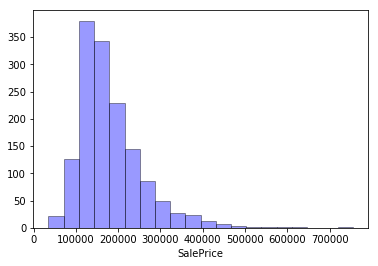

In [48]:
# How SalePrice is distributed:
sns.distplot(target, hist=True, kde=False, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [49]:
# Log transformation to make errors for houses with different prices have the same impact
# Maybe FunctionTransformer from sklearn.preprocessing should be used
target = np.log1p(target)

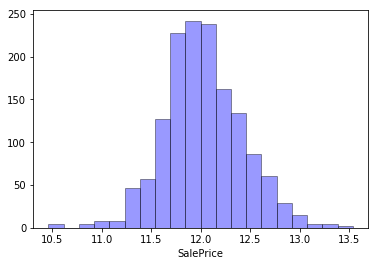

In [50]:
# How SalePrice is distributed after log transformation:
sns.distplot(target, hist=True, kde=False, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [51]:
X = data[:train_id.shape[0]]
y = target
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))

X: (1460, 93)
y: (1460,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (1095, 93)
y_train: (1095,)
X_test: (365, 93)
y_test: (365,)


In [53]:
# scale numerical features

#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
lr.score(X_train, y_train)

0.9178512711515279

In [56]:
lr.score(X_test, y_test)

0.8610917137193645